<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [1072]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
import plotly.io as pio
pio.renderers.default = 'iframe'
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [1073]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [1074]:
# Show Sample of Data
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12655,Coburg,69 Victoria St,3,t,720000.0,PI,Century,29/04/2017,7.8,3058.0,...,2.0,2.0,531.0,112.0,2016.0,Darebin City Council,-37.74240,144.95710,Northern Metropolitan,11204.0
30013,Airport West,35 Cameron St,3,h,776000.0,S,Nelson,9/12/2017,10.4,3042.0,...,2.0,2.0,190.0,134.0,2012.0,Moonee Valley City Council,-37.73026,144.88652,Western Metropolitan,3464.0
22850,Toorak,8/38 Grange Rd,3,u,NaN,PI,hockingstuart,23/09/2017,4.1,3142.0,...,1.0,2.0,NaN,NaN,1950.0,Stonnington City Council,-37.83714,145.01218,Southern Metropolitan,7217.0
28758,Hawthorn East,5/16 Auburn Gr,2,u,595000.0,S,Noel,25/11/2017,6.2,3123.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,6482.0
34342,Hawthorn East,23A Myrniong Gr,5,h,3789000.0,S,Woodards,24/02/2018,6.2,3123.0,...,2.0,2.0,688.0,NaN,NaN,Boroondara City Council,-37.83950,145.05320,Southern Metropolitan,6482.0


In [1075]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 34857
Number of Columns : 21


In [1076]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [1077]:
# Check NaN Value
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [1078]:
# Describe Numiric Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [1079]:
# Describe non Numiric 
df.describe(exclude=np.number)

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


In [1080]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Suburb,34857,0,0.000000,351
Address,34857,0,0.000000,34009
Rooms,34857,0,0.000000,12
Type,34857,0,0.000000,3
Price,34857,7610,21.832057,2871
Method,34857,0,0.000000,9
SellerG,34857,0,0.000000,388
Date,34857,0,0.000000,78
Distance,34857,1,0.002869,215
Postcode,34857,1,0.002869,211


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Handling Missing Data (Nulls)
    </h1>
    </div>

## Delete Unnecessary columns

In [1081]:
df.drop(columns = ['Address','Postcode','SellerG','Lattitude','Longtitude'] , inplace = True)

## Handling Missing Data

- Delete the smallest number of missing values (Nulls) ​​in columns to reduce missing values a from the data

In [1082]:
df.dropna(subset = ['Price','Bedroom2','Distance','Bedroom2','Bathroom',
                   'Car','CouncilArea','Regionname','Propertycount'] , inplace = True)

- 0.0 Founded in Column Landsize

In [1083]:
df['Landsize'].replace(0.0 , df['Landsize'].median() , inplace = True)

- Fill Missing Value (Nulls) as possiple

In [1084]:
df.fillna({'Landsize' : df['Landsize'].ffill(limit=2),
           'BuildingArea': df['BuildingArea'].ffill(limit=2),
           'YearBuilt' : df['YearBuilt'].ffill(limit=2)} , inplace = True)

In [1085]:
df.fillna({'Landsize' : df['Landsize'].bfill(limit=2),
           'BuildingArea': df['BuildingArea'].bfill(limit=2),
           'YearBuilt' : df['YearBuilt'].bfill(limit=2)} , inplace = True)

In [1086]:
# Check Number of missing value
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Date               0
Distance           0
Bedroom2           0
Bathroom           0
Car                0
Landsize         138
BuildingArea     678
YearBuilt        379
CouncilArea        0
Regionname         0
Propertycount      0
dtype: int64

- Delete the rest of the missing values (Nulls)

In [1087]:
df.dropna(inplace = True)

In [1088]:
# The New of Shape Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 19554
Number of Columns : 16


In [1089]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19554 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19554 non-null  object 
 1   Rooms          19554 non-null  int64  
 2   Type           19554 non-null  object 
 3   Price          19554 non-null  float64
 4   Method         19554 non-null  object 
 5   Date           19554 non-null  object 
 6   Distance       19554 non-null  float64
 7   Bedroom2       19554 non-null  float64
 8   Bathroom       19554 non-null  float64
 9   Car            19554 non-null  float64
 10  Landsize       19554 non-null  float64
 11  BuildingArea   19554 non-null  float64
 12  YearBuilt      19554 non-null  float64
 13  CouncilArea    19554 non-null  object 
 14  Regionname     19554 non-null  object 
 15  Propertycount  19554 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 2.5+ MB


In [1090]:
# Check NaN Value
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [1091]:
# Describe Numiric (After Delete Null)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,19554.0,3.063977e+00,0.947531,1.0,2.0,3.0,4.0,16.0
Price,19554.0,1.086337e+06,656809.706148,85000.0,655000.0,905000.0,1330000.0,11200000.0
Distance,19554.0,1.145188e+01,6.890933,0.0,6.6,10.5,14.2,48.1
Bedroom2,19554.0,3.048737e+00,0.958361,0.0,2.0,3.0,4.0,20.0
Bathroom,19554.0,1.598343e+00,0.703804,0.0,1.0,1.0,2.0,9.0
Car,19554.0,1.713614e+00,0.992794,0.0,1.0,2.0,2.0,18.0
Landsize,19554.0,6.739364e+02,3957.713316,1.0,347.0,533.0,668.0,433014.0
BuildingArea,19554.0,1.587150e+02,466.016120,0.0,101.0,134.0,185.0,44515.0
YearBuilt,19554.0,1.967171e+03,36.761057,1196.0,1950.0,1970.0,2000.0,2019.0
Propertycount,19554.0,7.480767e+03,4387.629276,83.0,4380.0,6543.0,10331.0,21650.0


In [1092]:
# Describe non Numiric (After Delete Null)
df.describe(exclude=np.number)

,Suburb,Type,Method,Date,CouncilArea,Regionname
count,19554,19554,19554,19554,19554,19554
unique,337,3,5,78,33,8
top,Reservoir,h,S,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,449,14685,12784,594,1808,5956


In [1093]:
# The New Cardinality
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Suburb,19554,0,0.0,337
Rooms,19554,0,0.0,11
Type,19554,0,0.0,3
Price,19554,0,0.0,2561
Method,19554,0,0.0,5
Date,19554,0,0.0,78
Distance,19554,0,0.0,210
Bedroom2,19554,0,0.0,14
Bathroom,19554,0,0.0,10
Car,19554,0,0.0,13


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [1094]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Price: 938 outliers detected
Distance: 873 outliers detected
Bedroom2: 18 outliers detected
Bathroom: 231 outliers detected
Car: 1114 outliers detected
Landsize: 648 outliers detected
BuildingArea: 909 outliers detected
YearBuilt: 40 outliers detected
Propertycount: 449 outliers detected


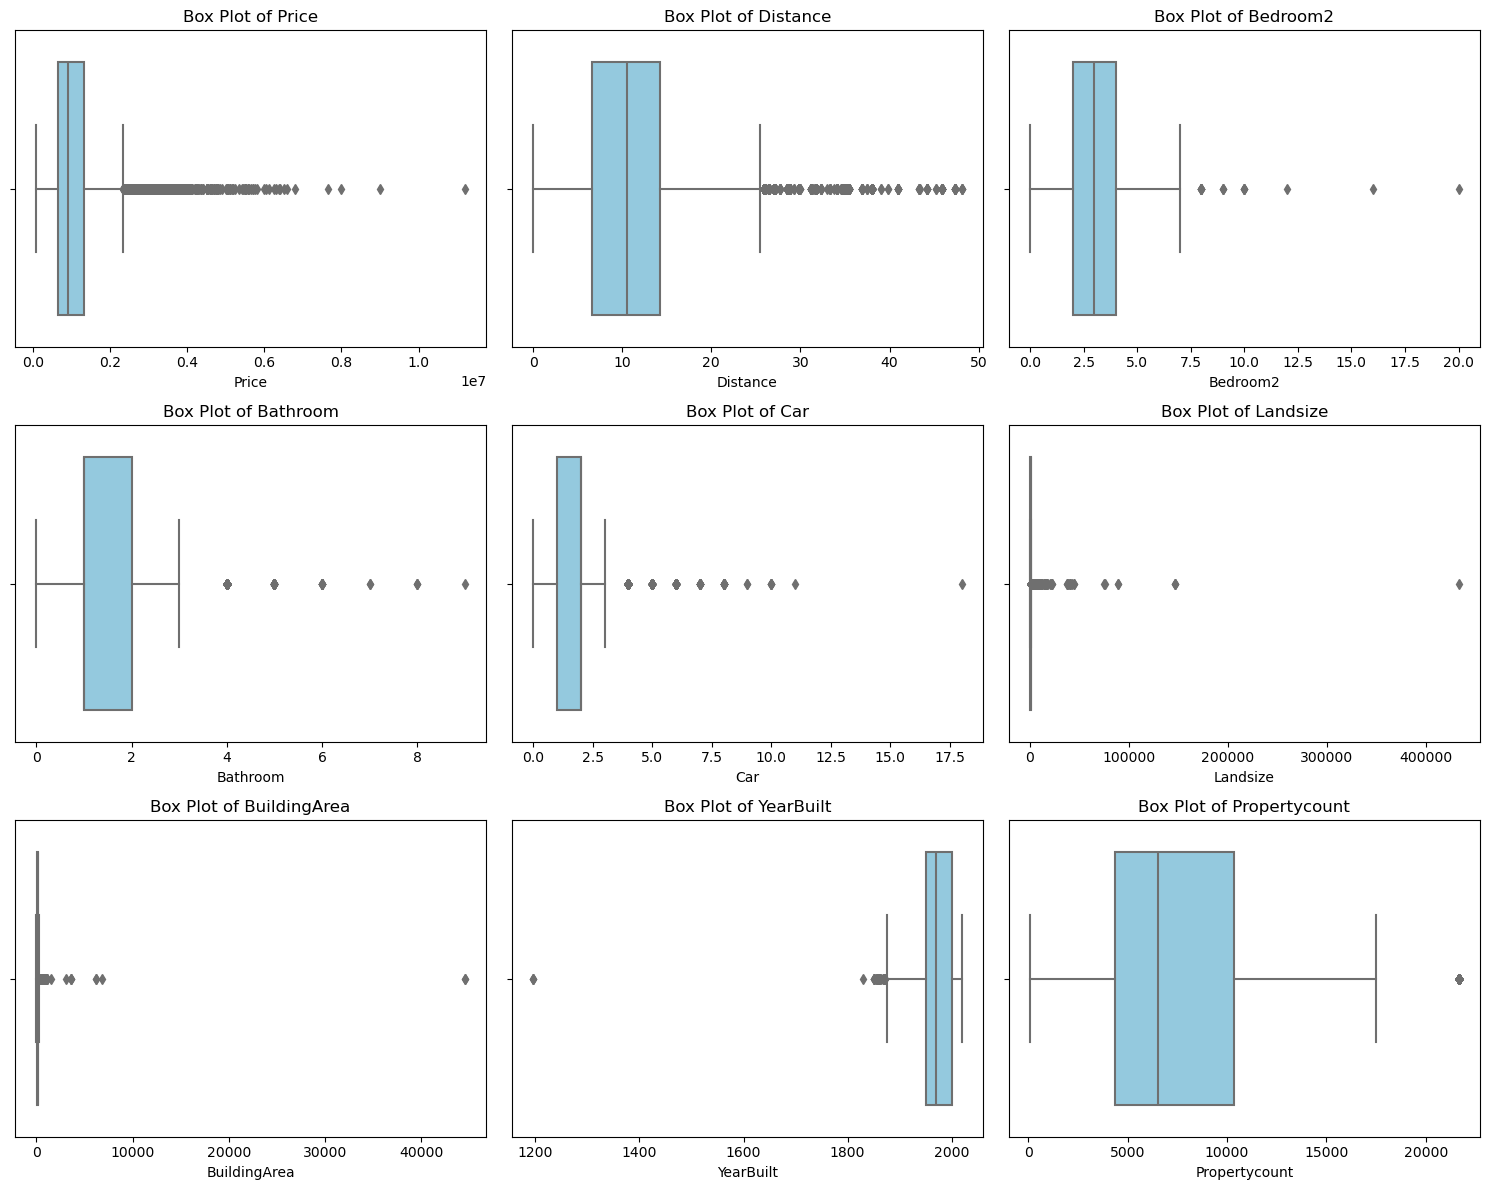

In [1095]:
numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [1096]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

numerical_columns =  ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Propertycount"]

df_cleaned = remove_outliers(df, numerical_columns)

In [1097]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 15237
Number of Columns : 16


## Cleaned Data BoxPlot To Show Outliers

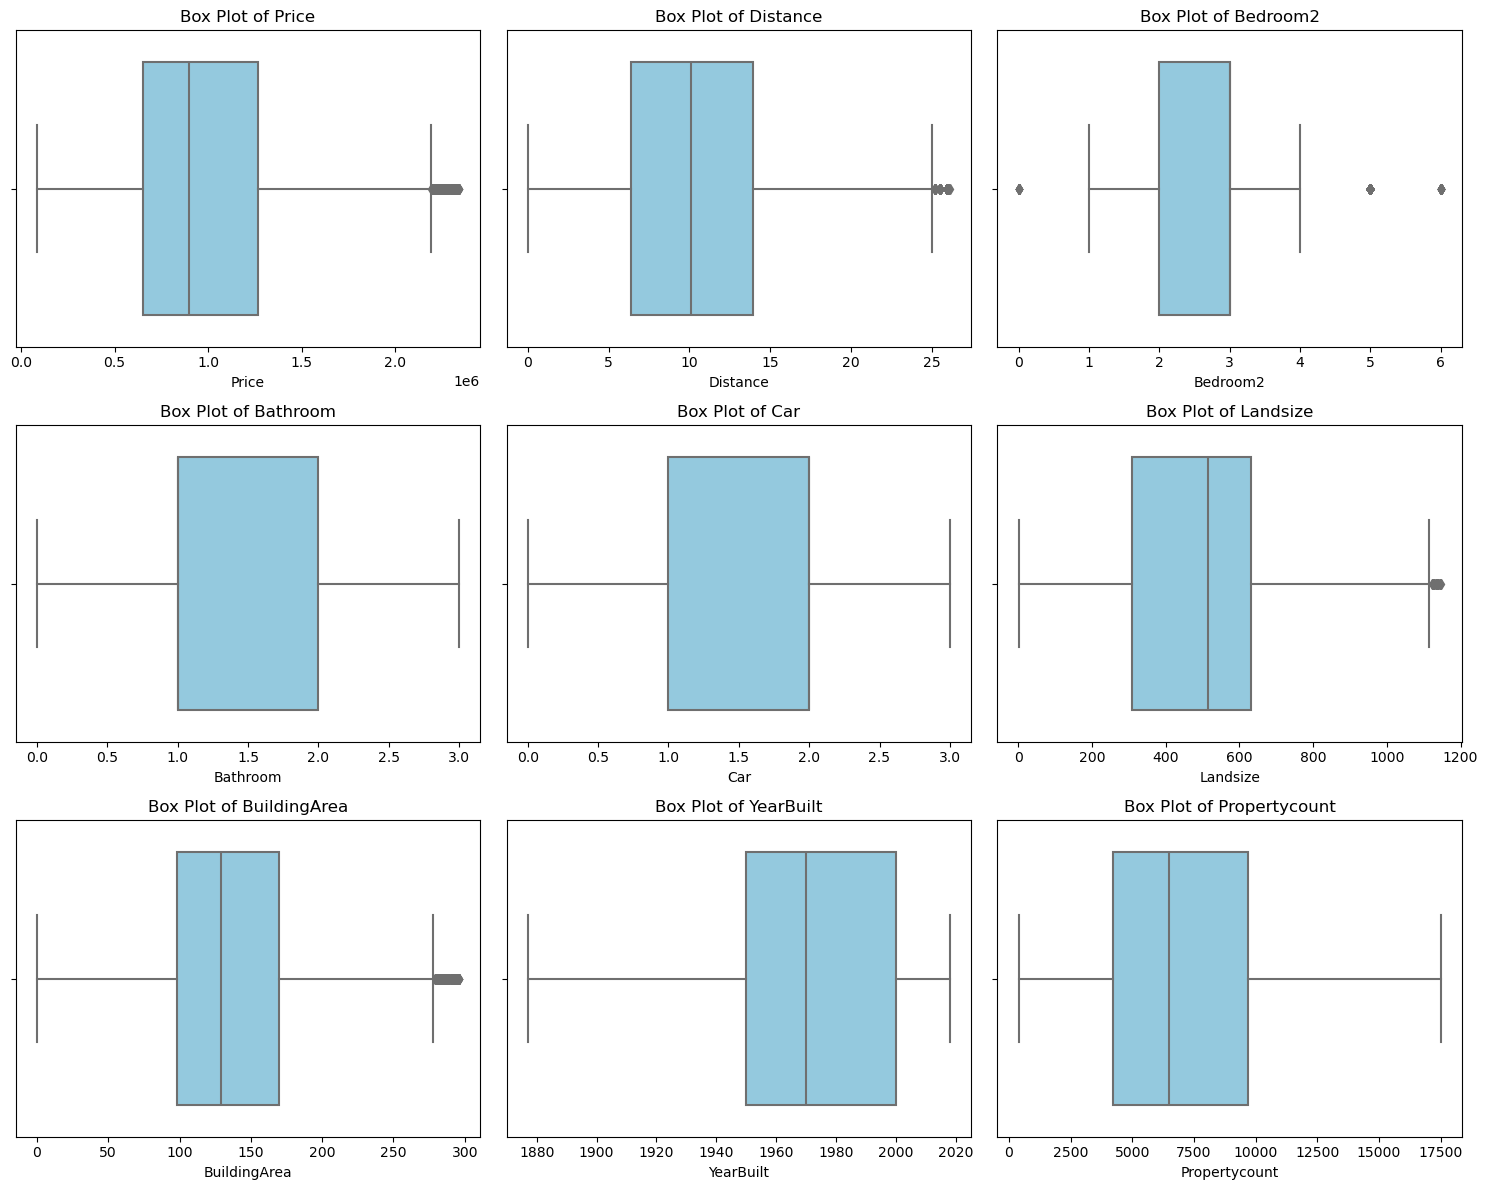

In [1098]:
numerical_columns = ["Price", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize",
                     "BuildingArea", "YearBuilt", "Propertycount"]
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [1099]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.sample(5)

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
10842,Bundoora,3,h,745000.0,S,23/09/2017,12.1,3.0,1.0,2.0,586.0,158.0,1970.0,Banyule City Council,Northern Metropolitan,10175.0
11765,Highett,3,t,900000.0,S,14/10/2017,16.0,3.0,2.0,1.0,558.0,272.0,1900.0,Bayside City Council,Southern Metropolitan,4794.0
3299,Middle Park,2,h,1515000.0,S,14/05/2016,4.1,3.0,1.0,0.0,98.0,67.0,1900.0,Port Phillip City Council,Southern Metropolitan,2019.0
8709,Craigieburn,4,h,615000.0,S,12/08/2017,20.6,4.0,2.0,2.0,756.0,222.0,2001.0,Hume City Council,Northern Metropolitan,15510.0
6444,Glenroy,3,h,820000.0,S,22/04/2017,13.0,3.0,1.0,1.0,697.0,142.6,1960.0,Moreland City Council,Northern Metropolitan,8870.0


In [1100]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15237 entries, 0 to 15236
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         15237 non-null  object 
 1   Rooms          15237 non-null  int64  
 2   Type           15237 non-null  object 
 3   Price          15237 non-null  float64
 4   Method         15237 non-null  object 
 5   Date           15237 non-null  object 
 6   Distance       15237 non-null  float64
 7   Bedroom2       15237 non-null  float64
 8   Bathroom       15237 non-null  float64
 9   Car            15237 non-null  float64
 10  Landsize       15237 non-null  float64
 11  BuildingArea   15237 non-null  float64
 12  YearBuilt      15237 non-null  float64
 13  CouncilArea    15237 non-null  object 
 14  Regionname     15237 non-null  object 
 15  Propertycount  15237 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.9+ MB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Types of suburbs included in the data

In [1101]:
print(f"Number of Subrub in Data '{df_cleaned['Suburb'].nunique()}'")

Number of Subrub in Data '269'


In [1102]:
fig = px.bar(df_cleaned['Suburb'].value_counts()[:10],
             color = df_cleaned['Suburb'].value_counts()[:10].index,
             template = 'plotly_dark',
             title = 'Top 10 Subrub in Data',
             labels = {'Subrub':'Name of Subrub','value':'Number of frequencies'},
             text_auto = True
             )
fig.show()

## Average Prices in Top 10 Suburbs

In [1103]:
Top_10_Subrub = df_cleaned['Suburb'].value_counts()[:10].index
avg_price_subrub = df_cleaned.groupby('Suburb')['Price'].mean()
avg_prices = []
for i in Top_10_Subrub:
    avg_prices.append(avg_price_subrub.get(i))

In [1104]:
fig = px.line(x = Top_10_Subrub,
              y = avg_prices,
              line_shape = 'spline',
              markers = '*',
              template = 'plotly_dark',
              labels = {'y':'Average Price','x':'Suburb'},
              color_discrete_sequence = ['red'],
              title = 'Average Price in each Suburb'
              )
fig.show()

- Highest average selling price in the suburb of Northcote

## Number of Rooms and average Selling price

In [1105]:
Types_of_Rooms = df_cleaned['Rooms'].value_counts().sort_index()
fig = px.pie(values = Types_of_Rooms,
             names = ['One Rooms','Two Rooms','Three Rooms','Four Rooms','Five Rooms','Six Rooms'],
             template = 'plotly_dark',
             title = 'Number of Rooms spread in the Apartments'
             ).update_traces(textinfo='label+percent')
fig.show()

In [1106]:
avg_Price_Rooms = df_cleaned.groupby('Rooms')['Price'].mean()
fig = px.line(avg_Price_Rooms,
              line_shape = 'spline',
              markers = '*',
              template = 'plotly_dark',
              labels = {'value':'Average Price'},
              color_discrete_sequence = ['red'],
              title = 'Average price Per Number of Rooms'
              )
fig.show()

- The highest average prices are apartments containing 6 rooms

## Types of Property and Average Price

In [1107]:
Types_of_property = df_cleaned['Type'].value_counts()
fig = px.pie(values = Types_of_property,
             names = ['House, cottage, villa, semi, terrace','Unit, duplex','Townhouse'],
             template = 'plotly_dark',
             title = 'Types of Property spread in the Apartments'
             ).update_traces(textinfo='label+percent')
fig.show()

In [1108]:
avg_Price_property = df_cleaned.groupby('Type')['Price'].mean()
avg_Price_property = avg_Price_property.rename(index={'h':'House, cottage, villa, semi, terrace',
                                 'u':'Unit, duplex',
                                 't':'Townhouse'})
fig = px.bar(avg_Price_property,
              template = 'plotly_dark',
              labels = {'value':'Average Price'},
              color = avg_Price_property.index,
              title = 'Average price Per Type of Property',
              text_auto = True
              )
fig.show()

## Sale Methods in the Melbourne Housing Market

In [1109]:
Sale_method = df_cleaned['Method'].value_counts()
fig = px.pie(values = Sale_method,
             names = ['Sold', 'Sold Prior', 'Passed In', 'Vendor Bid', 'Sold After Auction'],
             template = 'plotly_dark',
             title = 'Sale Methods'
             ).update_traces(textinfo='label+percent')
fig.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

## Encode Object DataType 

In [1110]:
column_to_encode = df_cleaned.select_dtypes(object)
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [1111]:
# Show Data After some of Encode
df_cleaned.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,0,2,0,1480000.0,1,60,2.5,2.0,1.0,1.0,202.0,79.0,1900.0,25,2,4019.0
1,0,2,0,1035000.0,1,63,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,25,2,4019.0
2,0,3,0,1465000.0,3,64,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,25,2,4019.0
3,0,3,0,850000.0,0,64,2.5,3.0,2.0,1.0,94.0,150.0,1900.0,25,2,4019.0
4,0,4,0,1600000.0,4,65,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,25,2,4019.0


In [1112]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15237 entries, 0 to 15236
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         15237 non-null  int32  
 1   Rooms          15237 non-null  int64  
 2   Type           15237 non-null  int32  
 3   Price          15237 non-null  float64
 4   Method         15237 non-null  int32  
 5   Date           15237 non-null  int32  
 6   Distance       15237 non-null  float64
 7   Bedroom2       15237 non-null  float64
 8   Bathroom       15237 non-null  float64
 9   Car            15237 non-null  float64
 10  Landsize       15237 non-null  float64
 11  BuildingArea   15237 non-null  float64
 12  YearBuilt      15237 non-null  float64
 13  CouncilArea    15237 non-null  int32  
 14  Regionname     15237 non-null  int32  
 15  Propertycount  15237 non-null  float64
dtypes: float64(9), int32(6), int64(1)
memory usage: 1.5 MB


## Assign feature and target variables and Scale

In [1113]:
X = df_cleaned.drop(['Price','Date'] , axis = 1)
y = df_cleaned['Price']

In [1114]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

## Splitting Data 

In [1115]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [1116]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (11427, 14)
Shape of X_Test (3810, 14)
Shape of Y_Train (11427,)
Shape of Y_Test (3810,)


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [1136]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model,model_name):
    score = r2_score(y_test , model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

## Linear Regression Model

In [1137]:
lr = LinearRegression()
Kfold(lr,'Linear Regression')
train(lr,'Linear Regression')
r2(lr,'Linear Regression')

Linear Regression score on cross validation: 48.11994428704923%
Linear Regression model score on Training data: 49.07513696215179%
Linear Regression model score on Testing data: 51.61401134592598%
R2 Score for Linear Regression is 51.61401134592598%


## Random Forest Model

In [1138]:
rf_model = RandomForestRegressor(n_estimators = 100 , max_depth = 10)
Kfold(rf_model, "Random Forest")
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest score on cross validation: 76.15093581974635%
Random Forest model score on Training data: 85.03955672363874%
Random Forest model score on Testing data: 78.65091385222624%
R2 Score for Random Forest is 78.65091385222624%


## Bagging Model

In [1139]:
bag = BaggingRegressor(n_estimators = 50)
Kfold(bag,'Bagging')
train(bag,'Bagging')
r2(bag,'Bagging')

Bagging score on cross validation: 77.49367404333334%
Bagging model score on Training data: 97.03389318785952%
Bagging model score on Testing data: 80.41711544008827%
R2 Score for Bagging is 80.41711544008827%


## Gradient Boosting Model

In [1140]:
GrBoost = GradientBoostingRegressor(n_estimators = 200)
Kfold(GrBoost,'Gradient Boosting')
train(GrBoost,'Gradient Boosting')
r2(GrBoost,'Gradient Boosting')

Gradient Boosting score on cross validation: 78.20659992534853%
Gradient Boosting model score on Training data: 81.36710727313063%
Gradient Boosting model score on Testing data: 80.51696930852918%
R2 Score for Gradient Boosting is 80.51696930852918%


## KNN

In [1144]:
knn = KNeighborsRegressor()
Kfold(knn,'KNN')
train(knn,'KNN')
r2(knn,'KNN')

KNN score on cross validation: 66.06554385200114%
KNN model score on Training data: 78.55196249759648%
KNN model score on Testing data: 69.41520290081246%
R2 Score for KNN is 69.41520290081246%


## Decision Tree Regressor

In [1149]:
DTR = DecisionTreeRegressor()
Kfold(DTR,'Decision Tree')
train(DTR,'Decision Tree')
r2(DTR,'Decision Tree')

Decision Tree score on cross validation: 55.636578492124315%
Decision Tree model score on Training data: 99.9977342979963%
Decision Tree model score on Testing data: 63.00014815703845%
R2 Score for Decision Tree is 63.00014815703845%


## XGBoost

In [1150]:
xgboost = XGBRegressor()
Kfold(xgboost, "XGBoost")
train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost score on cross validation: 79.01038990117189%
XGBoost model score on Training data: 92.8308523793778%
XGBoost model score on Testing data: 81.3502902694693%
R2 Score for XGBoost is 81.3502902694693%
